In [11]:
###QUICK SORT

def quick_sort(array):
    
    if(len(array))<=1:
        return array
    else:
        pivot=array[ len(array)//2]
        left=[x for x in array if x < pivot]
        right=[x for x in array if x > pivot]
        middle=[x for x in array if x == pivot]
        return quick_sort(left)+middle+quick_sort(right)

array=[10,23,6,54,2,1,13,50,30,110]
print(quick_sort(array))

[1, 2, 6, 10, 13, 23, 30, 50, 54, 110]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



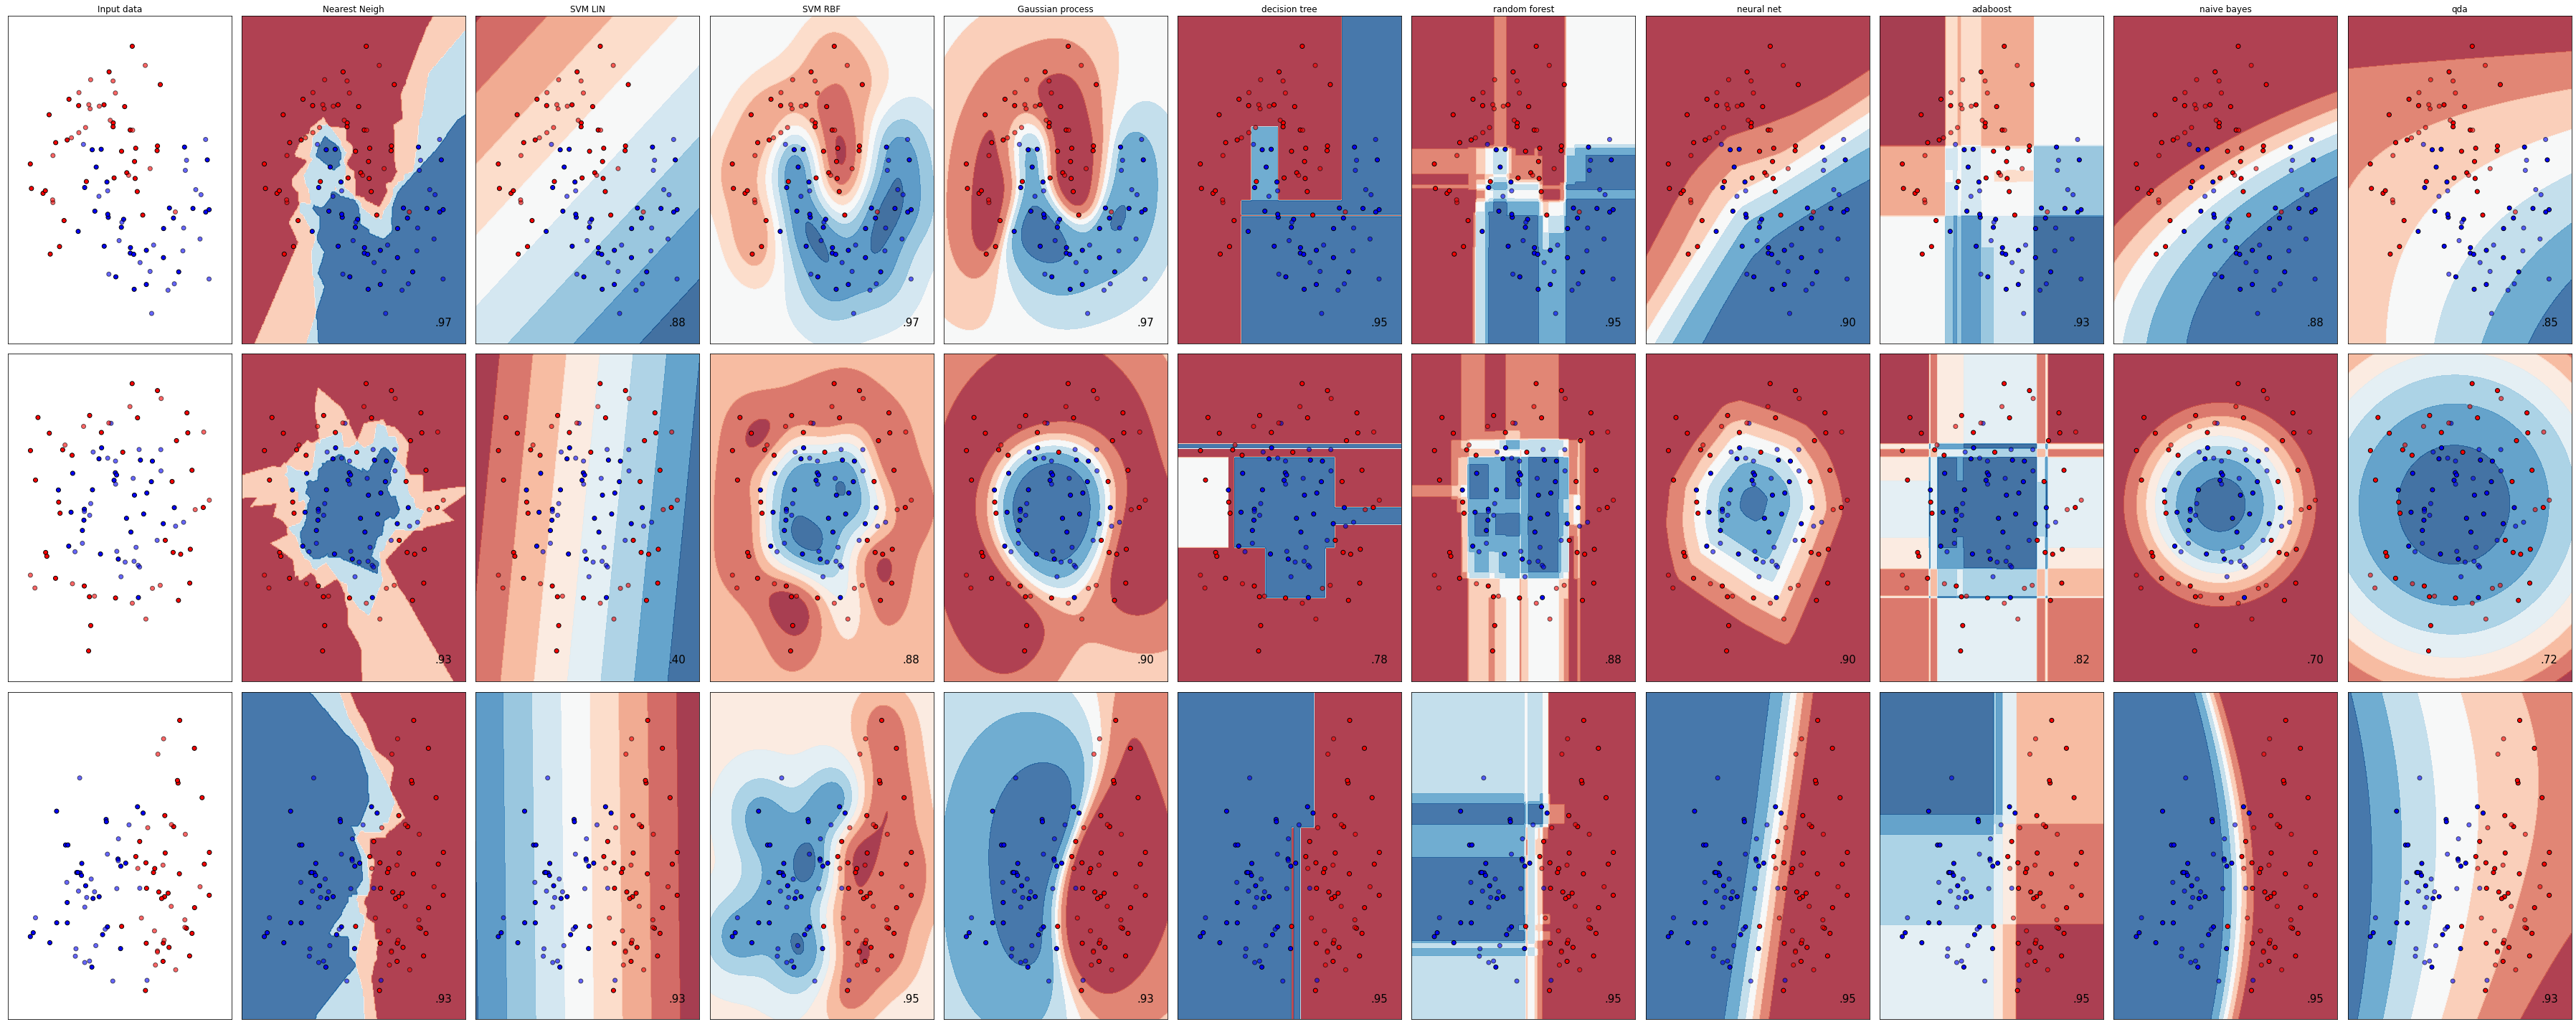

In [26]:
h=.02
names=['Nearest Neigh','SVM LIN','SVM RBF', 'Gaussian process','decision tree','random forest',' neural net', 'adaboost','naive bayes', 'qda']

classifiers=[
    KNeighborsClassifier(3),
    SVC(kernel='linear',C=0.025),
    SVC(gamma=2,C=1),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5,n_estimators=10, max_features=1),
    MLPClassifier(alpha=1,max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=1)
rng = np.random.RandomState(2)

X+=2 * rng.uniform(size=X.shape)
linearly_separable=(X,y)

datasets=[make_moons(noise=0.3,random_state=0),make_circles(noise=0.2,factor=0.5,random_state=1),linearly_separable]

figure=plt.figure(figsize=(50,20))
i=1

for ds_cnt,ds in enumerate(datasets):
    
    X,y=ds
    X=StandardScaler().fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
    
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    cm=plt.cm.RdBu
    cm_bright=ListedColormap(['#FF0000','#0000FF'])
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title('Input data')
    
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,edgecolors='k')
    
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    
    for name,clf in zip(names,classifiers):
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        clf.fit(X_train,y_train)
        
        score=clf.score(X_test,y_test)
        
        if hasattr(clf,'decision_function'):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        
        Z=Z.reshape(xx.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.8)
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,edgecolors='k')
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,edgecolors='k',alpha=0.6)
        
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt==0:
            ax.set_title(name)
        ax.text(xx.max()-.3,yy.min()+.3,('%.2f' % score).lstrip('0'),size=15,horizontalalignment='right')
        i+=1

plt.tight_layout()
plt.show()

In [30]:
import psutil

print("Core fisici",psutil.cpu_count(logical=False))
print("Core logici",psutil.cpu_count(logical=True))

cpufreq=psutil.cpu_freq()

print(f"Freq max: {cpufreq.max:.2f}Mhz")
print(f"Freq min: {cpufreq.min:.2f}Mhz")
print(f"Freq min: {cpufreq.current:.2f}Mhz")

print("CPU USO PER CORE")

for i,percentage in enumerate(psutil.cpu_percent(percpu=True,interval=1)):
    print(f'Core {i}: {percentage}%')
print(f'Total CPU USage {psutil.cpu_percent()}%')


Core fisici 2
Core logici 4
Freq max: 2195.00Mhz
Freq min: 0.00Mhz
Freq min: 2195.00Mhz
CPU USO PER CORE
Core 0: 16.4%
Core 1: 13.6%
Core 2: 20.0%
Core 3: 15.4%
Total CPU USage 11.2%


[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7 11]
 [11 10]
 [ 4  7]]
[[-6.24341634 -0.39829803]
 [-3.41506182 -0.37803219]
 [-0.5867073  -0.35776636]
 [ 4.34771374  1.79896473]
 [ 6.49431192 -1.72127905]
 [-0.59684021  1.0564109 ]]
[22.48440812  1.54892521]
[[ 0.71215509 -0.70202217]
 [ 0.70202217  0.71215509]]


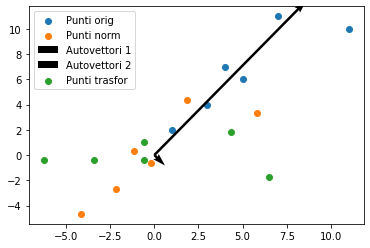

In [56]:
## PCA
import numpy as np
import matplotlib.pyplot as plt

A=np.array([[1,2],[3,4],[5,6],[7,11],[11,10],[4,7]])
plt.scatter(A[:,0],A[:,1])
print(A)
M=np.mean(A.T,axis=1)
C=A-M
plt.scatter(C[:,0],C[:,1])
V=np.cov(C.T)
values,vectors=np.linalg.eig(V)
P=vectors.T.dot(C.T)
print(P.T)
print(values)
print(vectors)
plt.quiver(0,0,vectors[0][0],vectors[0][1],scale=values[0])
plt.quiver(0,0,vectors[1][0],vectors[1][1],scale=values[1])
plt.scatter(P.T[:,0],P.T[:,1])
plt.legend(['Punti orig','Punti norm','Autovettori 1','Autovettori 2','Punti trasfor'])

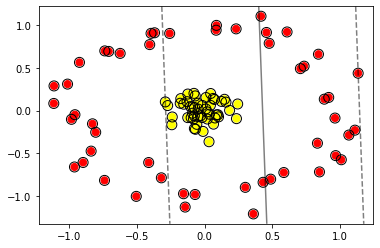

In [63]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC

X,y=make_circles(100,factor=.1,noise=.1)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

model=SVC(kernel='linear').fit(X,y)

ax=plt.gca()

xlim=ax.get_xlim()
ylim=ax.get_ylim()

xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)

YY,XX=np.meshgrid(yy,xx)

xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)

ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')

plt.show()

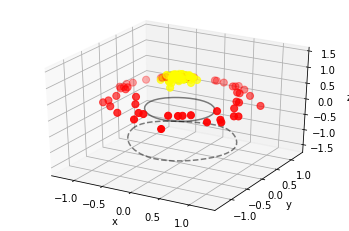

In [68]:
from mpl_toolkits import mplot3d

r=np.exp(-(X**2).sum(1))

ax=plt.subplot(projection='3d')
ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

model=SVC(kernel='rbf').fit(X,y)
ax=plt.gca()

xlim=ax.get_xlim()
ylim=ax.get_ylim()

xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)

YY,XX=np.meshgrid(yy,xx)

xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)




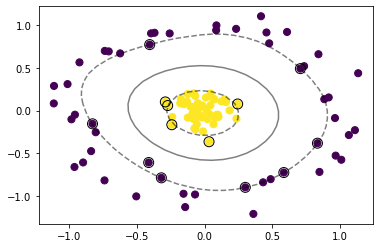

In [75]:
plt.scatter(X[:,0],X[:,1],c=y,s=50)
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
plt.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

